# Speech Act Classification using Support Vector Machines 
Where the output is multiple classes

This takes the file and extracts the sentences and labels

In [1]:
import pandas as pd

raw_data = pd.read_excel("../data/adjusted-labels-multiclass-no-comms.xlsx")
raw_data.dropna(subset=['Sentence'], inplace=True)  # Get rid of anything NaN

sentences = raw_data["Sentence"]
labels = raw_data.drop(columns=["Sentence"])

## Analysing Data Distribution
Here we will look at the output file that has the labelled data and sentences and analyse the distribution

In [2]:
raw_data.head()

,Sentence,Intel (from newspapers),Directions,Woods,Buildings,Hills and Forests,Named Locations,Fire words,Rescue words,Action words,Reasoning words
0,this is Charlie,0,0,0,0,0,0,0,0,0,0
1,Roger over,0,0,0,0,0,0,0,0,0,0
2,Bravo I didn't find anything relevant just abo...,1,0,1,1,0,1,0,0,1,0
3,nothing really relevant just saying its open I...,0,0,0,0,0,0,0,0,0,0
4,Charlie I've got advertisement feature for the...,1,0,0,0,0,0,0,0,0,0


Determine the data size and dimensions

In [3]:
raw_data.shape

(2692, 11)

In [4]:
raw_data.nunique()

Sentence                   2359
Intel (from newspapers)       2
Directions                    2
Woods                         2
Buildings                     2
Hills and Forests             2
Named Locations               2
Fire words                    2
Rescue words                  2
Action words                  2
Reasoning words               2
dtype: int64

In [5]:
print(raw_data.duplicated().sum())

333


In [6]:
raw_data.isna().sum()

Sentence                   0
Intel (from newspapers)    0
Directions                 0
Woods                      0
Buildings                  0
Hills and Forests          0
Named Locations            0
Fire words                 0
Rescue words               0
Action words               0
Reasoning words            0
dtype: int64

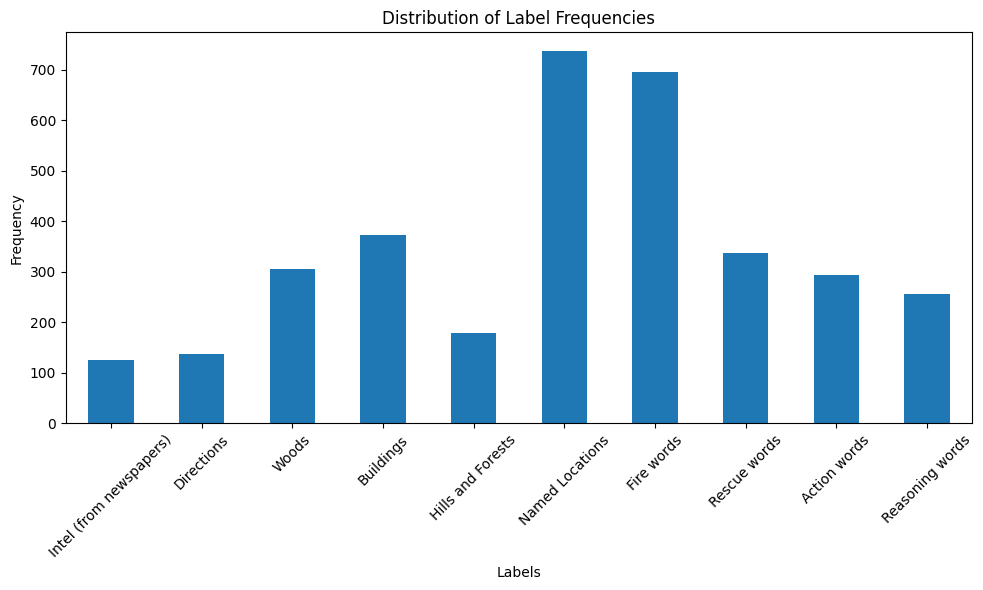

In [7]:
import matplotlib.pyplot as plt

label_counts = raw_data.drop(columns=["Sentence"]).sum()

# Plot distribution of label frequencies
plt.figure(figsize=(10, 6))
label_counts.plot(kind="bar")
plt.title("Distribution of Label Frequencies")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Preprocessing of the Data
This involves removing stop words, making sure everything is lower case, removing punctuation
Vectorising based on the Tf-idf values in the data set?

## Training the Model

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=26)

# TODO: try running without tfidf
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

svm_model = SVC(probability=True, kernel="linear")  # Adjust class weights
multi_target_svm = MultiOutputClassifier(svm_model, n_jobs=-1)  # n_jobs=-1 for parallel processing
multi_target_svm.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=SVC(kernel='linear', probability=True),
                      n_jobs=-1)

### These are the values for the report that does multilabel classification with these labels:
'Intel (from newspapers)', 'Directions', 'Woods', 'Buildings', 'Hills and Forests', 'Named Locations', 'Fire words', 'Rescue words', 'Action words', 'Reasoning words'

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Perform classification with SVM, kernel=linear
y_pred = multi_target_svm.predict(X_test_tfidf)
print("Classification Report:")
report = classification_report(y_test, y_pred, zero_division=0)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(report)

Classification Report:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       1.00      0.67      0.80        24
           2       1.00      0.72      0.84        61
           3       0.98      0.89      0.93        54
           4       1.00      0.74      0.85        27
           5       0.98      0.94      0.96       131
           6       1.00      0.95      0.97       133
           7       1.00      0.86      0.92        63
           8       1.00      0.74      0.85        58
           9       1.00      0.89      0.94        54

   micro avg       0.99      0.85      0.92       620
   macro avg       1.00      0.78      0.86       620
weighted avg       0.99      0.85      0.91       620
 samples avg       0.54      0.50      0.52       620


TODO: 
- Have something that shows how often sentences overlap with different speech acts
- Break down situation awareness, DONE
- Try to stop over-fitting (limited data set), Attempting K-Fold below
- multilabel seems to be working best
- Bert -> delve into it's language model further to tailor it to this dataset
- Why SVM?
- Report + Presentation structure